# Kernel-Filters

In [1]:
import cv2
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:

def resize(img, scale): # resize image to scale value param
    return cv2.resize(img, (int(img.shape[1] * scale), int(img.shape[0] * scale) ) )


def scaled(img, scale): # returns new scale value
    img_shape_x, img_shape_y, channels = img.shape
    if img_shape_x > scale:
        return scale / img_shape_x
    else:
        return 1
    

def color_filter(image, lower_upper_list): # 2nd param now takes a list to handle python3
    lower = np.array(lower_upper_list[0], dtype="uint8")
    upper = np.array(lower_upper_list[1], dtype="uint8")
    
    mask = cv2.inRange(image, lower, upper)
    output = cv2.bitwise_and(image, image, mask = mask)
    
    return output, mask


In [3]:

img_folder = "../images/"

img_base_name = "1257"

img_path = img_folder + img_base_name + ".jpg"

img = cv2.imread(img_path)

img.shape

(608, 808, 3)

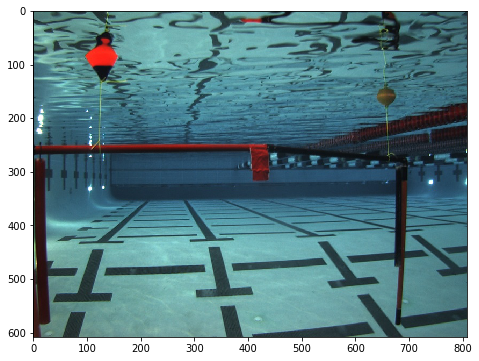

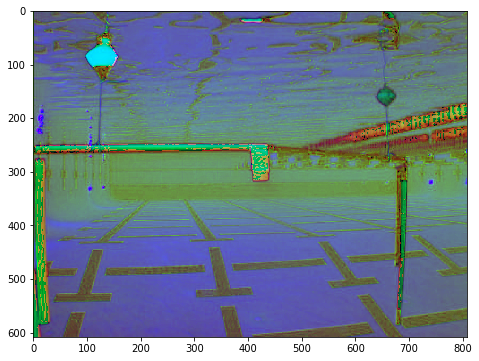

In [4]:
plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB) )
plt.show()

plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2HSV) )
plt.show()

In [5]:
## RGB
#lower_thresh = np.array([0, 0, 0])
#upper_thresh = np.array([100, 255, 255])

#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [6]:
## HSV
lower_thresh = np.array([0, 120, 50])
upper_thresh = np.array([10, 255, 255])

img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [7]:
#img_color_filt, mask = color_filter(img, [lower_thresh, upper_thresh] )
img_color_filt, mask = color_filter(img_hsv, [lower_thresh, upper_thresh] )

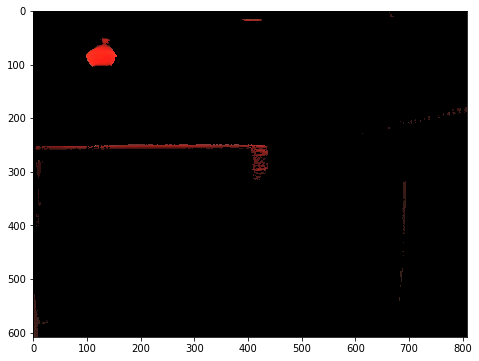

In [8]:
plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(img_color_filt, cv2.COLOR_HSV2RGB) )
plt.show()

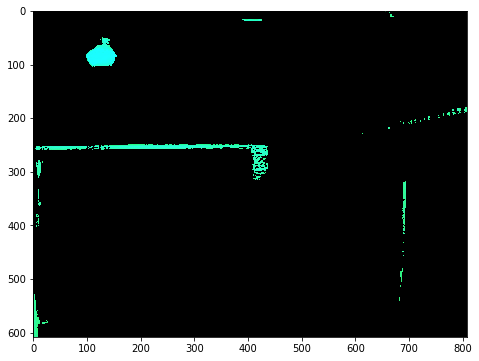

In [9]:
plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(img_color_filt, cv2.COLOR_BGR2HSV) )
plt.show()

## Morphs

*kernels*

In [65]:
kernel = np.ones((5, 5), np.uint8)

In [66]:
horiz = [
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]
]
vert = [
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
]

sorbel_horiz = [
    [1, 2, 1],
    [0, 0, 0],
    [-1, -2, -1]
]
sorbel_vert = [
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
]

shar_edge_horiz = [
    [3, 10, 3],
    [0, 0, 0],
    [-3, -10, -3]
]
shar_edge_vert = [
    [3, 0, -3],
    [10, 0, -10],
    [3, 0, -3]
]

diag_pos = [
    [0, 1, 0],
    [1, 0, -1],
    [0, -1, 0]
]

diag_neg = [
    [0, 1, 0],
    [-1, 0, 1],
    [0, -1, 0]
]

In [67]:
'''
kernel_vert = np.array(sorbel_x, np.uint8)/9
kernel_horiz = np.array(sorbel_y, np.uint8)/9
kernel_diag_pos = np.array(diag_pos, np.uint8)/9
kernel_diag_neg = np.array(diag_neg, np.uint8)/9
'''

kernel_horiz = np.array(horiz, np.uint8)
kernel_vert = np.array(vert, np.uint8)

#kernel_horiz = np.array(shar_edge_horiz, np.uint8)
#kernel_vert = np.array(shar_edge_vert, np.uint8)

#kernel_horiz = np.array(sorbel_horiz, np.uint8)
#kernel_vert = np.array(sorbel_vert, np.uint8)

kernel_diag_pos = np.array(diag_pos, np.uint8)
kernel_diag_neg = np.array(diag_neg, np.uint8)

#kernel_1 = np.ones((5, 5), np.float32) / 25 # tutorial basic

## *erode - fade/trim*

In [68]:
erode_morph = cv2.erode(img_color_filt, kernel, iterations=1)

#erode_morph = cv2.erode(img_color_filt, kernel_horiz, iterations=1)
#erode_morph = cv2.erode(img_color_filt, kernel_vert, iterations=1)

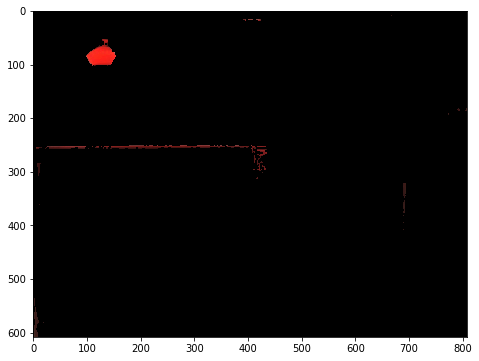

In [69]:
plt.figure(figsize=(10, 6) )
#plt.imshow(erode_morph, cmap="gray")
plt.imshow(cv2.cvtColor(erode_morph, cv2.COLOR_HSV2RGB) )
plt.show()

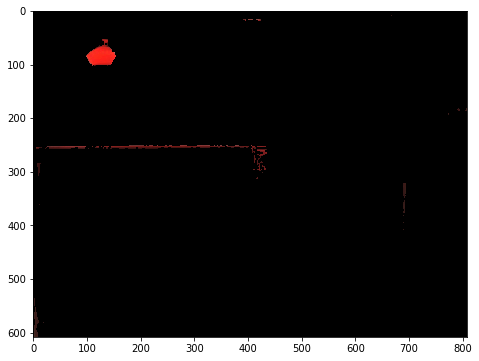

In [70]:
plt.figure(figsize=(10, 6) )
#plt.imshow(erode_morph, cmap="gray")
plt.imshow(cv2.cvtColor(erode_morph, cv2.COLOR_HSV2RGB) )
plt.show()

## *open - remove specs*

In [83]:
open_morph = cv2.morphologyEx(img_color_filt, cv2.MORPH_OPEN, kernel)

#open_morph = cv2.morphologyEx(img_color_filt, cv2.MORPH_OPEN, kernel_horiz)
#open_morph = cv2.morphologyEx(img_color_filt, cv2.MORPH_OPEN, kernel_vert)

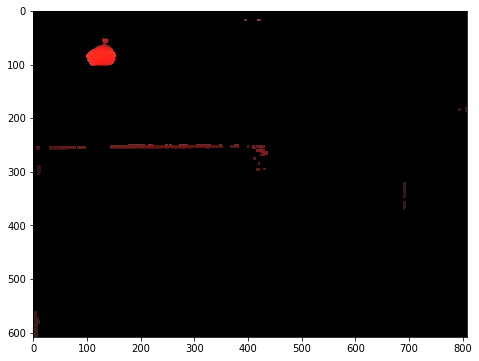

In [84]:
plt.figure(figsize=(10, 6) )
#plt.imshow(open_morph, cmap="gray")
plt.imshow(cv2.cvtColor(open_morph, cv2.COLOR_HSV2RGB) )
plt.show()

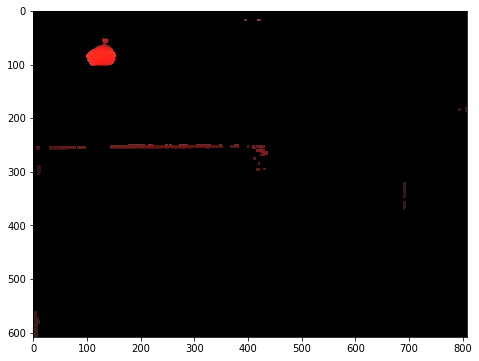

In [85]:
plt.figure(figsize=(10, 6) )
#plt.imshow(open_morph, cmap="gray")
plt.imshow(cv2.cvtColor(open_morph, cv2.COLOR_HSV2RGB) )
plt.show()

## *closing - fill in*

In [86]:
close_morph = cv2.morphologyEx(img_color_filt, cv2.MORPH_CLOSE, kernel)

#close_morph = cv2.morphologyEx(img_color_filt, cv2.MORPH_CLOSE, kernel_horiz)
#close_morph = cv2.morphologyEx(img_color_filt, cv2.MORPH_CLOSE, kernel_vert)

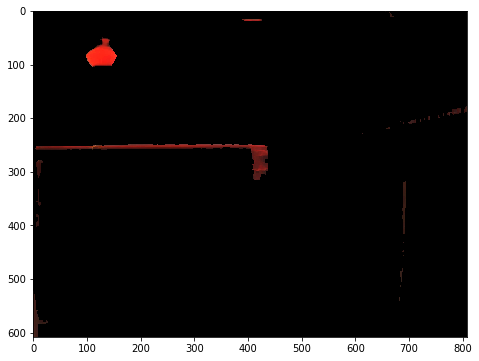

In [87]:
plt.figure(figsize=(10, 6) )
#plt.imshow(close_morph, cmap="gray")
plt.imshow(cv2.cvtColor(close_morph, cv2.COLOR_HSV2RGB) )
plt.show()

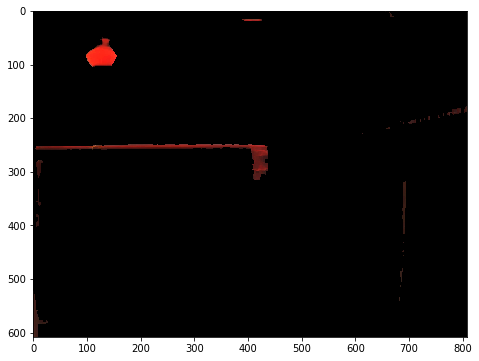

In [88]:
plt.figure(figsize=(10, 6) )
#plt.imshow(close_morph, cmap="gray")
plt.imshow(cv2.cvtColor(close_morph, cv2.COLOR_HSV2RGB) )
plt.show()

## *dilation - make chubby*

In [89]:
dilate_morph = cv2.dilate(img_color_filt, kernel, iterations=1)

#dilate_morph = cv2.dilate(img_color_filt, kernel_horiz, iterations=1)
#dilate_morph = cv2.dilate(img_color_filt, kernel_vert, iterations=1)

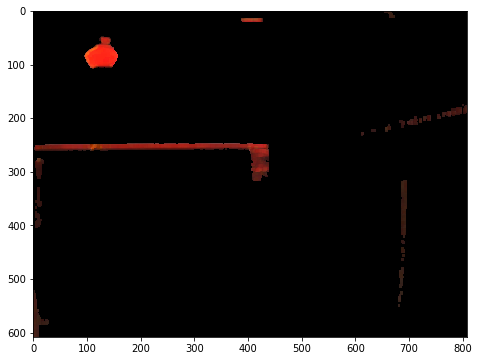

In [90]:
plt.figure(figsize=(10, 6) )
#plt.imshow(dilate_morph, cmap="gray")
plt.imshow(cv2.cvtColor(dilate_morph, cv2.COLOR_HSV2RGB) )
plt.show()

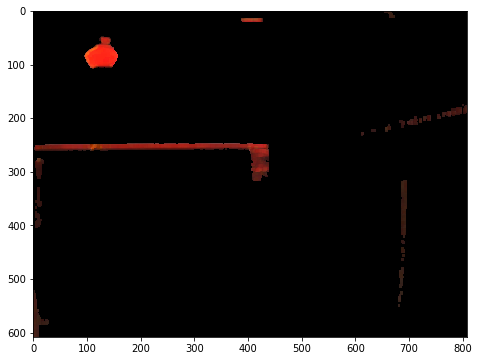

In [91]:
plt.figure(figsize=(10, 6) )
#plt.imshow(dilate_morph, cmap="gray")
plt.imshow(cv2.cvtColor(dilate_morph, cv2.COLOR_HSV2RGB) )
plt.show()

# FILTER testing